# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
from scipy import datasets, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

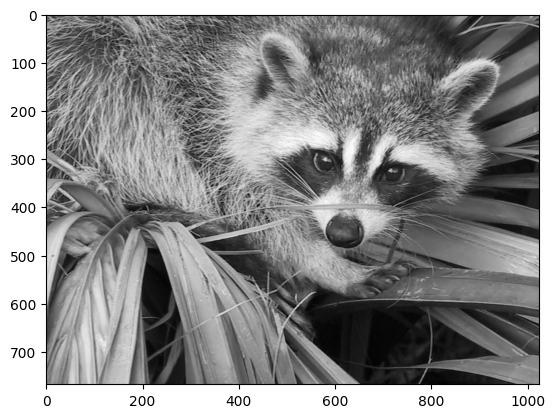

In [2]:
X = datasets.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițiile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

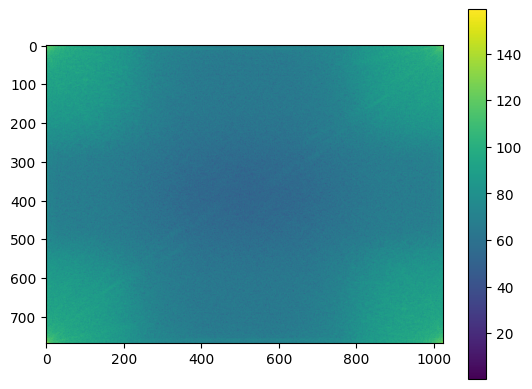

In [3]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

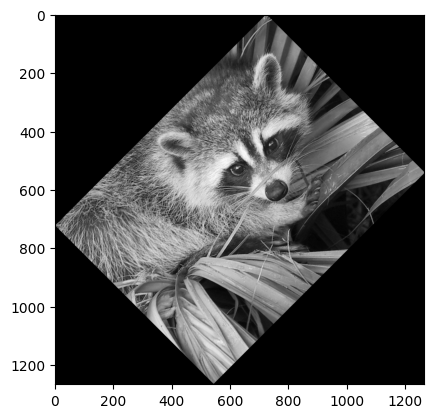

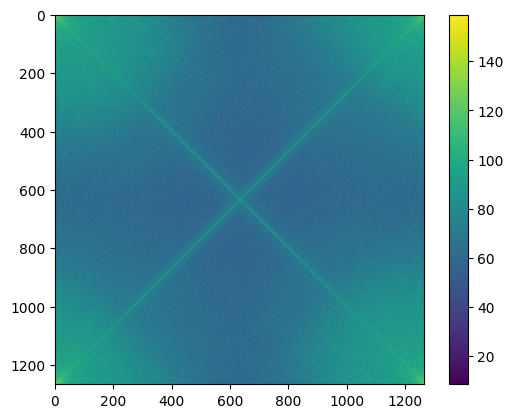

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

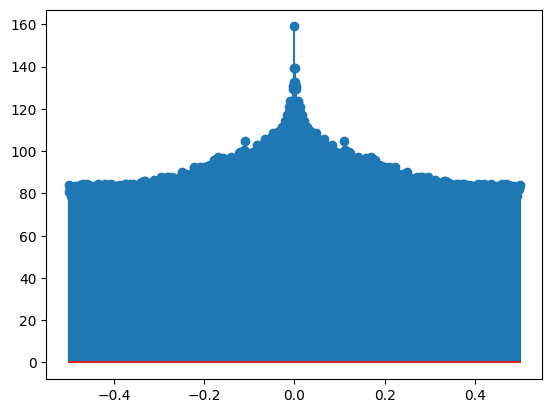

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

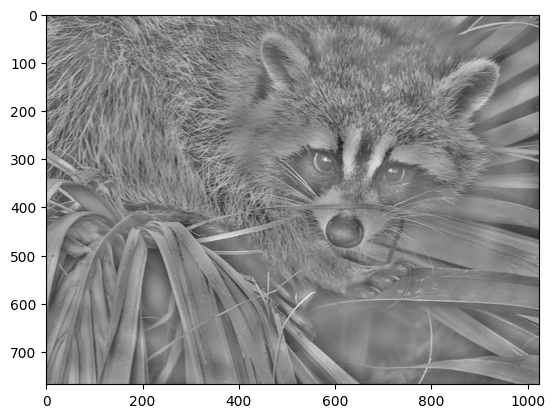

In [6]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

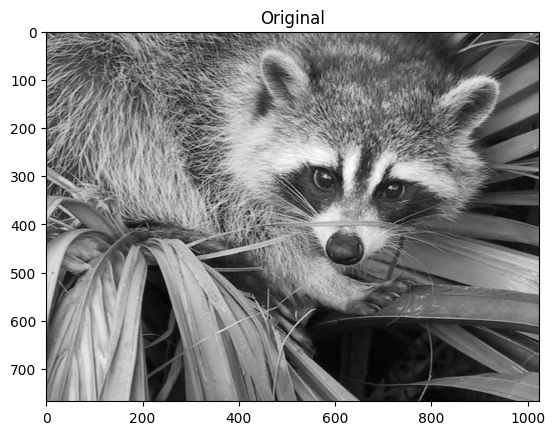

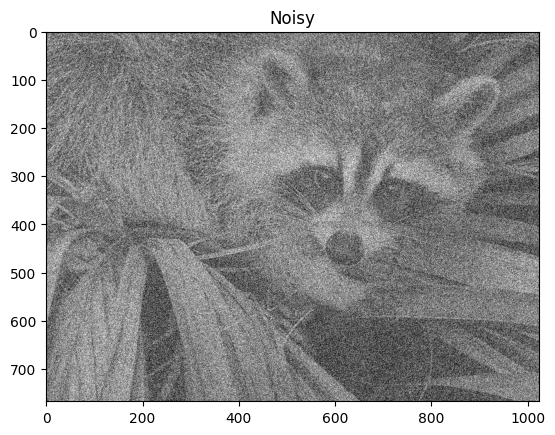

In [ ]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeniul frecvenței.

2. Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

### Rezolvare exercitiu 1

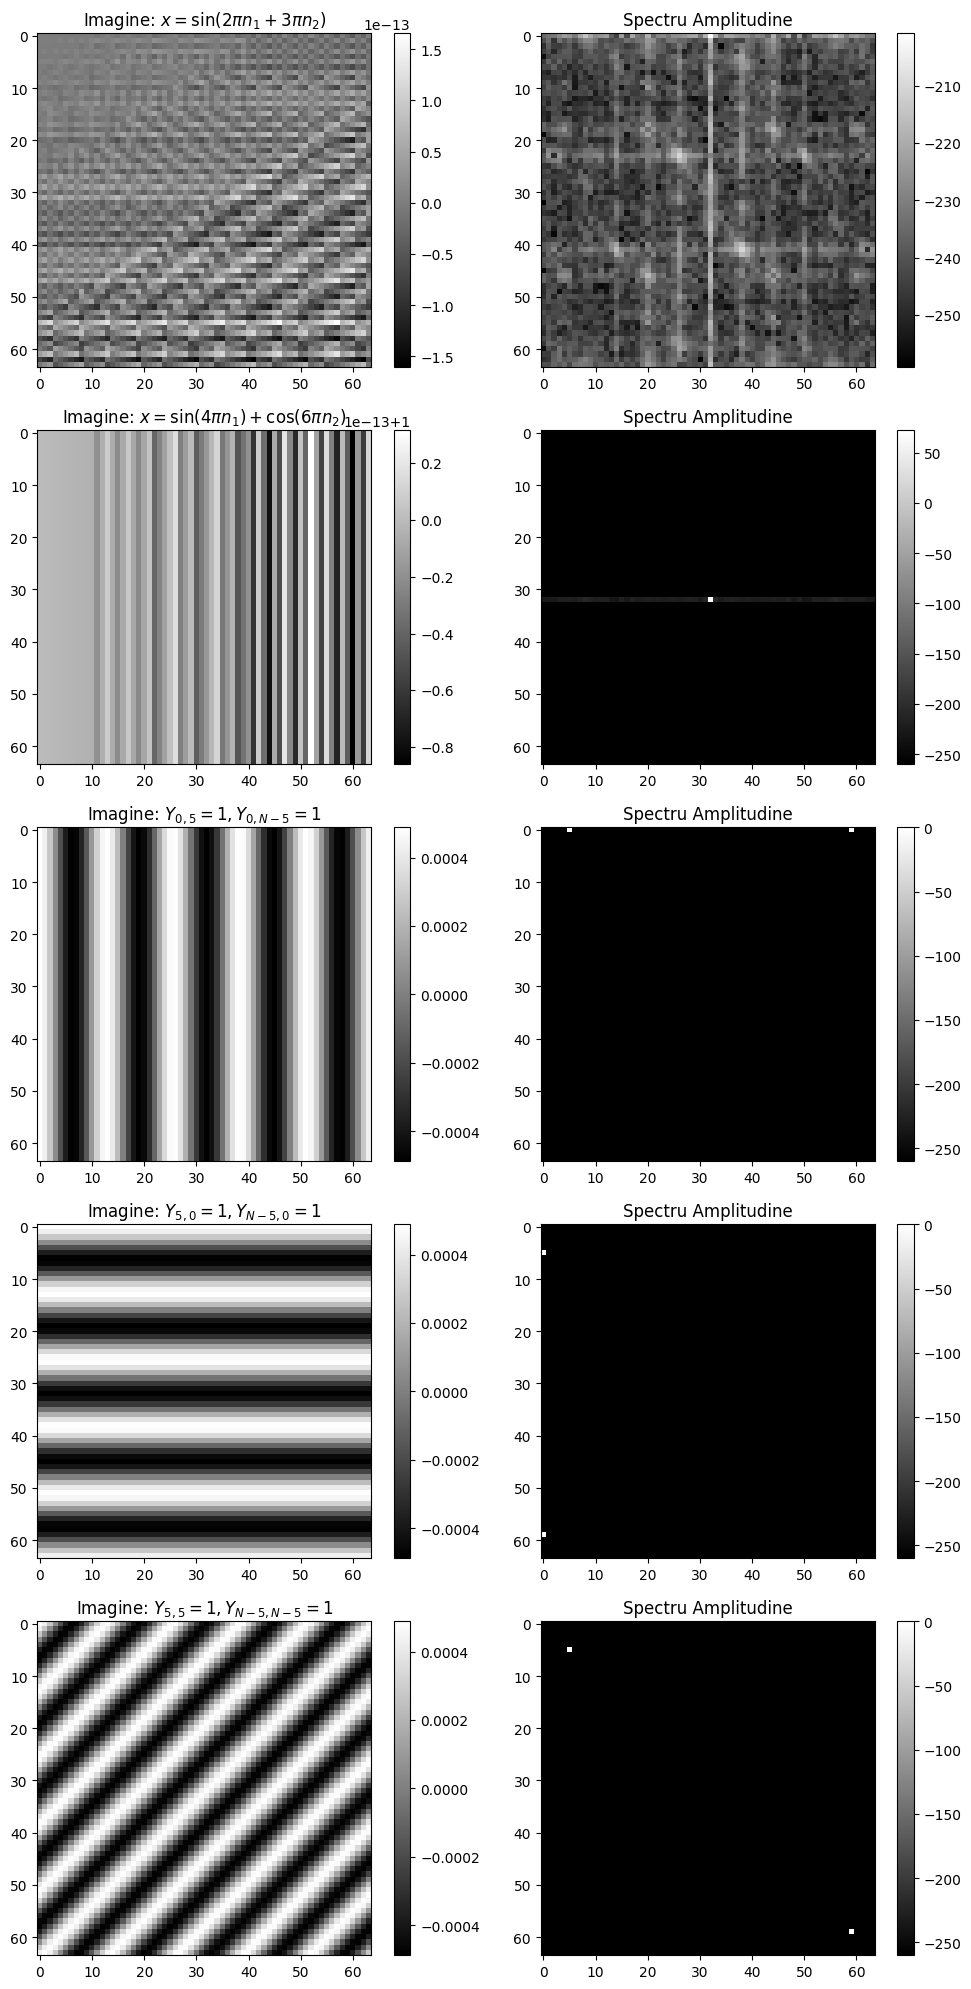

In [30]:
N = 64
n1 = np.arange(N)
n2 = np.arange(N)
n1, n2 = np.meshgrid(n1, n2)

data_list = []

#(a)
x1 = np.sin(2*np.pi*n1+3*np.pi*n2)
Y1 = np.fft.fftshift(np.fft.fft2(x1))
data_list.append((x1, np.abs(Y1), r'$x = \sin(2\pi n_1 + 3\pi n_2)$'))

#(b)
x2 = np.sin(4*np.pi*n1)+np.cos(6*np.pi*n2)
Y2 = np.fft.fftshift(np.fft.fft2(x2))
data_list.append((x2, np.abs(Y2), r'$x = \sin(4\pi n_1) + \cos(6\pi n_2)$'))

# (c)
Y3 = np.zeros((N, N), dtype=complex)
Y3[0, 5] = 1
Y3[0, N-5] = 1
x3 = np.fft.ifft2(Y3)
data_list.append((np.real(x3), np.abs(Y3), r'$Y_{0,5}=1, Y_{0,N-5}=1$'))

#(d)
Y4 = np.zeros((N, N), dtype=complex)
Y4[5, 0] = 1
Y4[N-5, 0] = 1
x4 = np.fft.ifft2(Y4)
data_list.append((np.real(x4), np.abs(Y4), r'$Y_{5,0}=1, Y_{N-5,0}=1$'))

#(e)
Y5 = np.zeros((N, N), dtype=complex)
Y5[5, 5] = 1
Y5[N-5, N-5] = 1
x5 = np.fft.ifft2(Y5)
data_list.append((np.real(x5), np.abs(Y5), r'$Y_{5,5}=1, Y_{N-5,N-5}=1$'))

fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, (img, spectrum, title) in enumerate(data_list):
    ax_img = axes[i, 0]
    ax_spec = axes[i, 1]

    im1 = ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_title(f'Imagine: {title}')
    plt.colorbar(im1, ax=ax_img)

    im2 = ax_spec.imshow(20*np.log10(abs(spectrum+1e-13)),cmap=plt.cm.gray)
    ax_spec.set_title('Spectru Amplitudine')
    plt.colorbar(im2, ax=ax_spec)

plt.tight_layout()
plt.savefig("../plots/1.pdf")
plt.show()

#### Observatii:
1. Daca ne uitam pe bara din dreapta, scala de valori este foarte mica, si matematic vorbind ar fi trebuit sa fie o imagine doar cu 0 uri, pt ca $sin(n*pi)$ e zero mereu, nu n intreg, deci practic noi acolo avem doar zgomot rezultat din erorile de calcul.

2. Facand si aici calculul matematic, $sin(4*pi*n1)=0$ si $cos(6*pi*n2)=1$(din faptu ca avem multipli intregi de perioada). Erorile variaza pe axa orizontala (n1), dar constante pe verticala. In ceea ce priveste spectrul, punctul alb central este media semnalului (tot 1, pt ca si semnalu e "constant"). Apoi mai observam si linia aceea orizontala, care din ce am inteles eu este un fel de spectru al erorilor din prima imagine, erorile pe verticala, dupa Fourier se transpun in orizontal si sunt vizibile din cauza ca afisez cu scara logaritmica.

3. Aici am setat manual Y(0,5)=1. Indicele 0 pe randuri inseamna frecventa nula pe verticala (semnalu e constant sus-jos), iar indicele 5 pe coloane inseamna variatie pe orizontala, de unde rezulta dungile verticale. In spectru, punctele albe sunt pe marginea de sus (randul 0) confirmand lipsa frecventei verticale, iar pozitia la indexul 5 ne arata fix de ce avem 5 benzi pe latimea imaginii. Noi punem si Y(0,N-5)=1, pentru ca vrem sa avem simetria pe care o cere Fourier, mai ales ca plecam de la spectru si vrem sa ajungem la o imagine sinusoida frumoasa, nu cu numere complexe.

4. Fenomenul anterior doar ca transpus.

5. Avem Y(5,5)=1. Asta inseamna ca avem variatie simultana: si pe verticala (index 5 la randuri) si pe orizontala (index 5 la coloane). Combinand cele doua miscari, ne rezulta liniile diagonale. In spectru, punctul alb e la intersectia randului 5 cu coloana 5, iar celalalt de la (N-5, N-5) e perechea lui pentru simetrie, ca sa iasa imaginea reala.

### Rezolvare Exercitiu 2

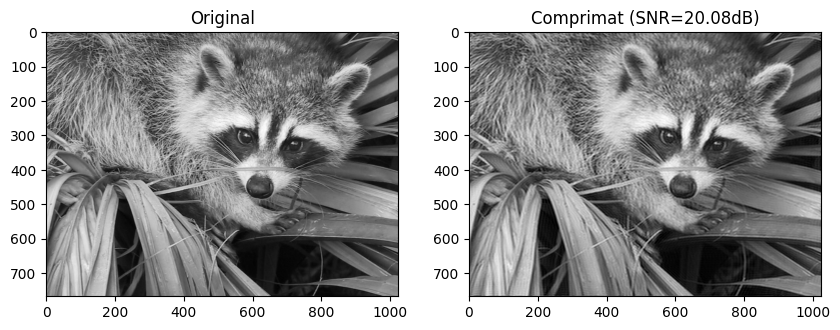

In [44]:
# X=datasets.face(gray=True)
X = X.astype(float)
m,n= X.shape
spectru = np.fft.fft2(X)

snr_target=20
raza=0
snr_curent = 0

while snr_curent<snr_target:
    raza += 2 
    mask = np.zeros_like(spectru)
    
    mask[0:raza,0:raza] = 1
    mask[0:raza,n-raza:n] = 1
    mask[m-raza:m,0:raza] = 1
    mask[m-raza:m,n-raza:n] = 1
    
    spectru_filt = spectru * mask
    
    X_filt = np.abs(np.fft.ifft2(spectru_filt))
    
    noise=np.sum((X-X_filt)**2)
    sig=np.sum(X**2)
    snr_curent = 10*np.log10(sig/noise)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(X_filt, cmap=plt.cm.gray)
plt.title(f"Comprimat (SNR={snr_curent:.2f}dB)")
plt.savefig("../plots/2.pdf")
plt.show()

### Rezolvare exercitiu 3

SNR Initial (Zgomotos): 0.73 dB
SNR Final: 3.09 dB


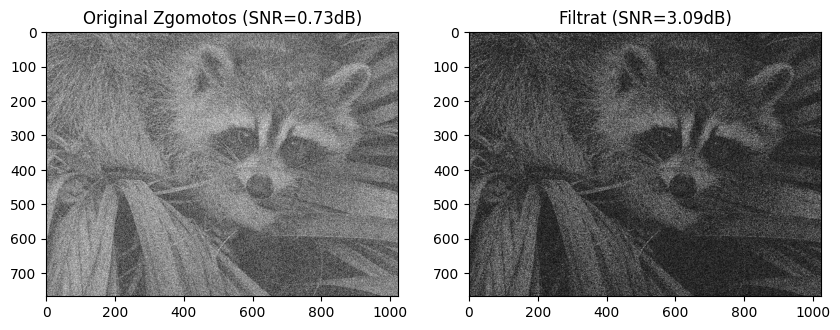

In [50]:
# X=datasets.face(gray=True)
X_orig = datasets.face(gray=True).astype(float)
X = X_noisy.astype(float)

m, n = X.shape
spectru = np.fft.fft2(X)

zgomot_init = np.sum((X_orig - X)**2)
semnal_init = np.sum(X_orig**2)
snr_start = 10 * np.log10(semnal_init / zgomot_init)

print(f"SNR Initial (Zgomotos): {snr_start:.2f} dB") 

snr_target = 20 
raza = 0
snr_curent = snr_start 

while snr_curent < snr_target:
    raza += 2
    mask = np.zeros_like(spectru)
    
    mask[0:raza, 0:raza] = 1
    mask[0:raza, n-raza:n] = 1
    mask[m-raza:m, 0:raza] = 1
    mask[m-raza:m, n-raza:n] = 1
    
    spectru_filt = spectru * mask
    X_filt = np.abs(np.fft.ifft2(spectru_filt))

    noise = np.sum((X_orig - X_filt)**2)
    sig = np.sum(X_orig**2)
    snr_curent = 10 * np.log10(sig / noise)
    
    if raza > min(m,n)//2: break

print(f"SNR Final: {snr_curent:.2f} dB")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap=plt.cm.gray)
plt.title(f"Original Zgomotos (SNR={snr_start:.2f}dB)")
plt.subplot(1, 2, 2)
plt.imshow(X_filt, cmap=plt.cm.gray)
plt.title(f"Filtrat (SNR={snr_curent:.2f}dB)")
plt.savefig("../plots/3.pdf") 
plt.show()